# Clustering Crypto

In [27]:
# Initial imports
import pandas as pd
import hvplot.pandas
from pathlib import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt


### Deliverable 1: Preprocessing the Data for PCA

In [28]:
# Load the crypto_data.csv dataset.
file_path = pd.read_csv('crypto_data.csv')
crypto_df = pd.DataFrame(file_path)
crypto_df.sample(10)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
1194,LSK,Lisk,DPoS,True,DPoS,1.200121e+08,159918400
481,PSI,PSIcoin,X11,True,PoS,NaN,696969
436,MUDRA,MudraCoin,X13,True,PoS,5.000000e+06,200000000
1224,ADM,Adamant,DPoS,True,DPoS,NaN,200000000
26,CETI,CETUS Coin,Scrypt,True,PoW/PoS,NaN,0
598,CHIEF,TheChiefCoin,Scrypt,True,PoW/PoS,NaN,2500000000
895,CROAT,Croat,CryptoNight,True,PoW,NaN,100467441
776,BMXT,Bitmxittz,Scrypt,False,PoW/PoS,NaN,10000
823,INN,Innova,NeoScrypt,True,PoW,6.375259e+06,45000000
297,TAM,TamaGucci,Scrypt,True,PoW/PoS/PoC,NaN,5300000


In [29]:
crypto_df = crypto_df.set_index('Unnamed: 0')
crypto_df.index.name = ''

In [30]:
# Keep all the cryptocurrencies that are being traded.
crypto_df = crypto_df[crypto_df.IsTrading == True]
crypto_df.sample(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
,,,,,,
ECA,Electra,NIST5,True,PoW/PoS,2.839915e+10,30000000000
XBOT,SocialXbotCoin,Scrypt,True,PoW/PoS,0.000000e+00,2000000
ACID,AcidCoin,SHA-256,True,PoW,NaN,4500000000
BENJI,BenjiRolls,Scrypt,True,PoW,2.027610e+07,35520400
XG,XG Sports,XG Hash,True,PoW/PoS,NaN,0
EXP,Expanse,Ethash,True,PoW,1.049528e+07,16906397
GBRC,GBR Coin,Scrypt,True,PoW,0.000000e+00,87500000
MADC,MadCoin,Scrypt,True,PoW,NaN,10000000
WAGE,Digiwage,Quark,True,PoS,2.729968e+07,120000000


In [31]:
crypto_df.shape

(1144, 6)

In [32]:
# Remove the "IsTrading" column. 
crypto_df = crypto_df.drop(['IsTrading'], axis = 1)
crypto_df.shape

(1144, 5)

In [33]:
# Remove rows that have at least 1 null value.
crypto_df = crypto_df.dropna()
crypto_df.shape

(685, 5)

In [34]:
# Keep the rows where coins are mined.
crypto_df = crypto_df.loc[crypto_df['TotalCoinsMined'] > 0]
crypto_df.shape

(532, 5)

In [35]:
# Create a new DataFrame that holds only the cryptocurrencies names.
crypto_names = crypto_df[['CoinName']]
crypto_names.head()

,CoinName
,
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [36]:
# Checking the crypto_df DataFrame index is the same index for this new DataFrame.
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [37]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypto_df = crypto_df.drop(['CoinName'], axis = 1)
crypto_df.shape

(532, 4)

In [38]:
crypto_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
LTC,Scrypt,PoW,6.303924e+07,84000000
DASH,X11,PoW/PoS,9.031294e+06,22000000
XMR,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethash,PoW,1.133597e+08,210000000


In [39]:
# Use get_dummies() to create variables for text features.
X = pd.get_dummies(crypto_df, columns = ['Algorithm', 'ProofType'])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Standardize the data with StandardScaler().
crypto_scaled = StandardScaler().fit_transform(X)
print(crypto_scaled[0:5])

[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
  -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
  -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
  -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
  -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
  -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
   1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
  -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.07530656 -0.43911856 -0.04339

### Deliverable 2: Reducing Data Dimensions Using PCA

In [41]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)

crypto_pca = pca.fit_transform(crypto_scaled)

In [42]:
# Create a DataFrame with the three principal components.

df_crypto_pca = pd.DataFrame(
    data=crypto_pca, columns=["PC 1", "PC 2", "PC 3"], index = crypto_df.index
)
df_crypto_pca.head()


,PC 1,PC 2,PC 3
,,,
42,-0.336814,1.031056,-0.573032
404,-0.320144,1.031300,-0.573084
1337,2.309937,1.696278,-0.561902
BTC,-0.144440,-1.329395,0.163981
ETH,-0.151435,-2.050480,0.367377


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

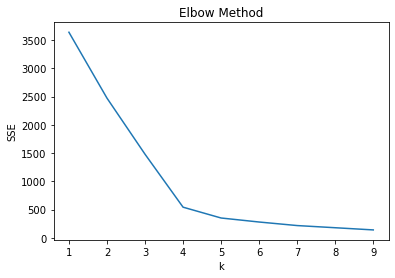

In [43]:
# Create an elbow curve to find the best value for K.
sse = {}
K = range(1,10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(df_crypto_pca)
    sse[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


Running K-Means with `k=4`

In [44]:
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(df_crypto_pca)

# Predict clusters
predictions = model.predict(df_crypto_pca)

# Add the predicted class columns
df_crypto_pca["class"] = model.labels_
df_crypto_pca.head()

,PC 1,PC 2,PC 3,class
,,,,
42,-0.336814,1.031056,-0.573032,0
404,-0.320144,1.031300,-0.573084,0
1337,2.309937,1.696278,-0.561902,0
BTC,-0.144440,-1.329395,0.163981,3
ETH,-0.151435,-2.050480,0.367377,3


In [45]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.

clustered_df = pd.concat([crypto_df,df_crypto_pca],axis =1)

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df['CoinName'] = crypto_names['CoinName']

# Add the predicted class columns
clustered_df["class"] = model.labels_

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,class,CoinName
,,,,,,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.336814,1.031056,-0.573032,0,42 Coin
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.320144,1.031300,-0.573084,0,404Coin
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.309937,1.696278,-0.561902,0,EliteCoin
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.144440,-1.329395,0.163981,3,Bitcoin
ETH,Ethash,PoW,1.076842e+08,0,-0.151435,-2.050480,0.367377,3,Ethereum
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.169932,-1.127602,-0.039960,3,Litecoin
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.383913,1.211396,-0.429342,0,Dash
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.151803,-2.227887,0.416721,3,Monero
ETC,Ethash,PoW,1.133597e+08,210000000,-0.149876,-2.050568,0.367393,3,Ethereum Classic


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [47]:
# Creating a 3D-Scatter with the PCA data and the clusters
import plotly.express as px

fig = px.scatter_3d(
  clustered_df,
  hover_name="CoinName",
  hover_data=["Algorithm"],
  x="PC 1",
  y="PC 2",
  z="PC 3",
  color="class",
  symbol="class",
  width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()




In [48]:
# Create a table with tradable cryptocurrencies.
clustered_df.hvplot.table(sortable=True, selectable=True)

:Table   [Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,class,CoinName]

In [50]:
# Print the total number of tradable cryptocurrencies.
clustered_df['CoinName'].count()

532

In [51]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
scaled =MinMaxScaler().fit_transform(clustered_df[["TotalCoinSupply","TotalCoinsMined"]])
print(scaled)

[[4.20000000e-11 0.00000000e+00]
 [5.32000000e-04 1.06585544e-03]
 [3.14159265e-01 2.95755135e-02]
 ...
 [1.40022261e-03 9.90135079e-04]
 [2.10000000e-05 7.37028150e-06]
 [1.00000000e-06 1.29582282e-07]]


In [53]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
final_df = pd.DataFrame(
    data = scaled,columns = ["TotalCoinSupply","TotalCoinsMined"], index = clustered_df.index
)

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
final_df = pd.concat([final_df,clustered_df['CoinName']],axis =1)

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
plot_df = pd.concat([final_df,clustered_df["class"]],axis =1)

plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,class
,,,,
42,4.200000e-11,0.000000,42 Coin,0
404,5.320000e-04,0.001066,404Coin,0
1337,3.141593e-01,0.029576,EliteCoin,0
BTC,2.100000e-05,0.000018,Bitcoin,3
ETH,0.000000e+00,0.000109,Ethereum,3
LTC,8.400000e-05,0.000064,Litecoin,3
DASH,2.200000e-05,0.000009,Dash,0
XMR,0.000000e+00,0.000017,Monero,3
ETC,2.100000e-04,0.000115,Ethereum Classic,3


In [55]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
plot_df.hvplot.scatter(x="TotalCoinsMined", y="TotalCoinSupply", by="class",hover_cols = ["CoinName"])


:NdOverlay   [class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)